In [1]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from prophet import Prophet

C:\Users\janna\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Loading Dataset

In [3]:
df0 = pd.read_csv("CONVENIENT_global_confirmed_cases.csv")
df1 = pd.read_csv("CONVENIENT_global_deaths.csv")

In [4]:
df0

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,3/5/23,21.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,56.0,0.0
1139,3/6/23,16.0,0.0,0.0,0.0,0.0,0.0,0.0,832.0,0.0,...,0.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,3/7/23,30.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,32.0,20.0,0.0,0.0,0.0,0.0,0.0
1141,3/8/23,15.0,16.0,4.0,15.0,11.0,0.0,0.0,0.0,489.0,...,0.0,176.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,149.0


In [5]:
df1

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,3/5/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1139,3/6/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1140,3/7/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1141,3/8/23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


### Creating World Dataframe

In [6]:
world = pd.DataFrame({"Country":[], "Cases":[]})

In [7]:
world["Country"] = df0.iloc[:,1:].columns

In [8]:
cases = []
for i in world["Country"]:
    cases.append(pd.to_numeric(df0[i][1:]).sum())
world["Cases"] = cases

### Cleaning Country Names

In [9]:
country_list = list(world["Country"].values)
idx = 0
for i in country_list:
    sayac = 0
    for j in i:
        if j == ".":
            i = i[:sayac]
            country_list[idx] = i
        elif j == "(":
            i = i[:sayac-1]
            country_list[idx] = i
        else:
            sayac += 1
    idx += 1
world["Country"] = country_list


In [10]:
world = world.groupby("Country")["Cases"].sum().reset_index()

In [11]:
world

,Country,Cases
0,Afghanistan,209451.0
1,Albania,334457.0
2,Algeria,271496.0
3,Andorra,47890.0
4,Angola,105288.0
...,...,...
195,West Bank and Gaza,703228.0
196,Winter Olympics 2022,535.0
197,Yemen,11945.0
198,Zambia,343135.0


In [12]:
world.isnull().sum()

Country    0
Cases      0
dtype: int64

### Loading Continent Dataset

In [13]:
continent = pd.read_csv("continents2.csv")


In [14]:
continent

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [15]:
continent["name"] = continent["name"].str.upper()

In [16]:
continent

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,AFGHANISTAN,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,ÅLAND ISLANDS,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,ALBANIA,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,ALGERIA,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,AMERICAN SAMOA,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,WALLIS AND FUTUNA,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,WESTERN SAHARA,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,YEMEN,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,ZAMBIA,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


In [17]:
world["Cases Range"] = pd.cut(
    world["Cases"],
    bins=[-150000, 50000, 200000, 800000, 1500000, 15000000],
    labels=["U50K", "50Kto200K", "200Kto800K", "800Kto1.5M", "1.5M+"]
)

In [18]:
world

,Country,Cases,Cases Range
0,Afghanistan,209451.0,200Kto800K
1,Albania,334457.0,200Kto800K
2,Algeria,271496.0,200Kto800K
3,Andorra,47890.0,U50K
4,Angola,105288.0,50Kto200K
...,...,...,...
195,West Bank and Gaza,703228.0,200Kto800K
196,Winter Olympics 2022,535.0,U50K
197,Yemen,11945.0,U50K
198,Zambia,343135.0,200Kto800K


In [19]:
# Update country names if necessary
def update_country_name(country_name):
    if country_name == "BRUNEI":
        return "BRUNEI DARUSSALAM"
    elif country_name == "US":
        return "UNITED STATES"
    return country_name

In [20]:
# Create a list for Alpha-3 codes
alpha = []
for country in world["Country"].str.upper().values:
    country = update_country_name(country)
    
    # Get the Alpha-3 code from the continent DataFrame
    alpha_code = continent[continent["name"] == country]["alpha-3"].values
   
    # Append the Alpha-3 code or NaN if not found
    if len(alpha_code) == 0:
        alpha.append(np.nan)
    else:
        alpha.append(alpha_code[0])

In [21]:
# Assign the Alpha-3 codes to the world DataFrame
world["Alpha3"] = alpha

In [22]:
world

,Country,Cases,Cases Range,Alpha3
0,Afghanistan,209451.0,200Kto800K,AFG
1,Albania,334457.0,200Kto800K,ALB
2,Algeria,271496.0,200Kto800K,DZA
3,Andorra,47890.0,U50K,AND
4,Angola,105288.0,50Kto200K,AGO
...,...,...,...,...
195,West Bank and Gaza,703228.0,200Kto800K,NaN
196,Winter Olympics 2022,535.0,U50K,NaN
197,Yemen,11945.0,U50K,YEM
198,Zambia,343135.0,200Kto800K,ZMB


In [23]:
world.isnull().sum()

Country         0
Cases           0
Cases Range    11
Alpha3         15
dtype: int64

### Creating a Choropleth Map

In [24]:
fig = px.choropleth(world.dropna(),
                   locations="Alpha3",
                   color="Cases Range",
                    projection="mercator",
                    color_discrete_sequence=["white","khaki","yellow","orange","red"])
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


In [25]:
count = []
for i in range(1, len(df0)):
    count.append(sum(pd.to_numeric(df0.iloc[i, 1:].values)))


In [26]:
df = pd.DataFrame()
df["Date"] = df0["Country/Region"][1:]
df["Cases"] = count
df = df.set_index("Date")

In [27]:
df

,Cases
Date,
1/23/20,100.0
1/24/20,287.0
1/25/20,493.0
1/26/20,683.0
1/27/20,809.0
...,...
3/5/23,56126.0
3/6/23,58040.0
3/7/23,130437.0


In [28]:
count = []
for i in range(1, len(df1)):
    count.append(sum(pd.to_numeric(df1.iloc[i, 1:].values)))


In [29]:
df["Deaths"] = count

In [30]:
df

,Cases,Deaths
Date,,
1/23/20,100.0,1.0
1/24/20,287.0,8.0
1/25/20,493.0,16.0
1/26/20,683.0,14.0
1/27/20,809.0,26.0
...,...,...
3/5/23,56126.0,148.0
3/6/23,58040.0,366.0
3/7/23,130437.0,923.0


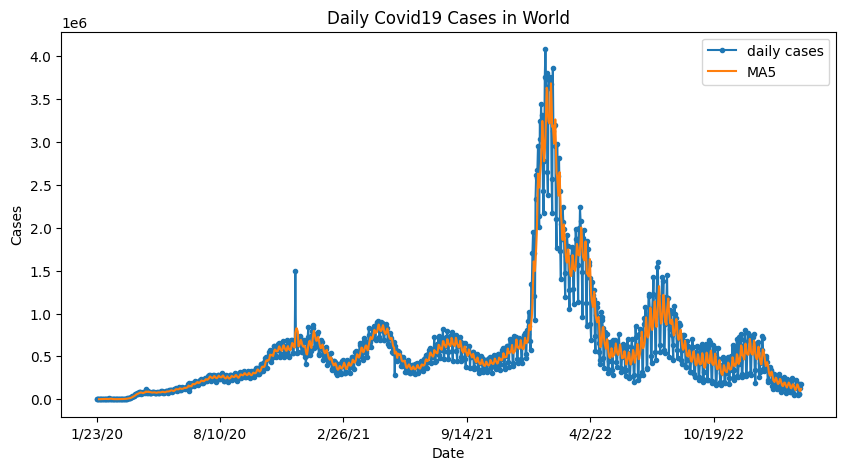

In [31]:
df.Cases.plot(title="Daily Covid19 Cases in World", marker=".", figsize=(10, 5), label="daily cases")
df.Cases.rolling(window=5).mean().plot(figsize=(10, 5), label="MA5")
plt.ylabel("Cases")
plt.legend()
plt.show()

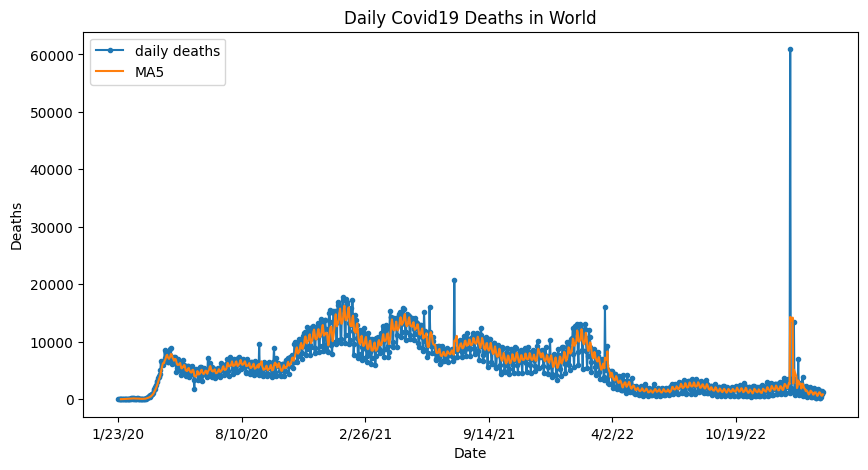

In [32]:
df.Deaths.plot(title="Daily Covid19 Deaths in World",marker=".",figsize=(10,5),label="daily deaths")
df.Deaths.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Deaths")
plt.legend()
plt.show()

In [33]:
df_fb = pd.DataFrame({"ds": [], "y": []})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"] = df.iloc[:, 0].values


### Dataset for Time Series Forcasting

In [34]:
df_fb

,ds,y
0,2020-01-23,100.0
1,2020-01-24,287.0
2,2020-01-25,493.0
3,2020-01-26,683.0
4,2020-01-27,809.0
...,...,...
1137,2023-03-05,56126.0
1138,2023-03-06,58040.0
1139,2023-03-07,130437.0
1140,2023-03-08,179446.0


### Model Training

In [35]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df_fb)

04:56:58 - cmdstanpy - INFO - Chain [1] start processing
04:56:59 - cmdstanpy - INFO - Chain [1] done processing


In [36]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)


In [37]:
# Show forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1237,2023-06-13,-732205.595528,-1.405778e+06,-96767.764443
1238,2023-06-14,-696277.115128,-1.387473e+06,-72816.324885
1239,2023-06-15,-702524.557123,-1.341976e+06,-102030.591947
1240,2023-06-16,-729008.110538,-1.389314e+06,-42196.654768
1241,2023-06-17,-912409.912448,-1.624918e+06,-248151.433728


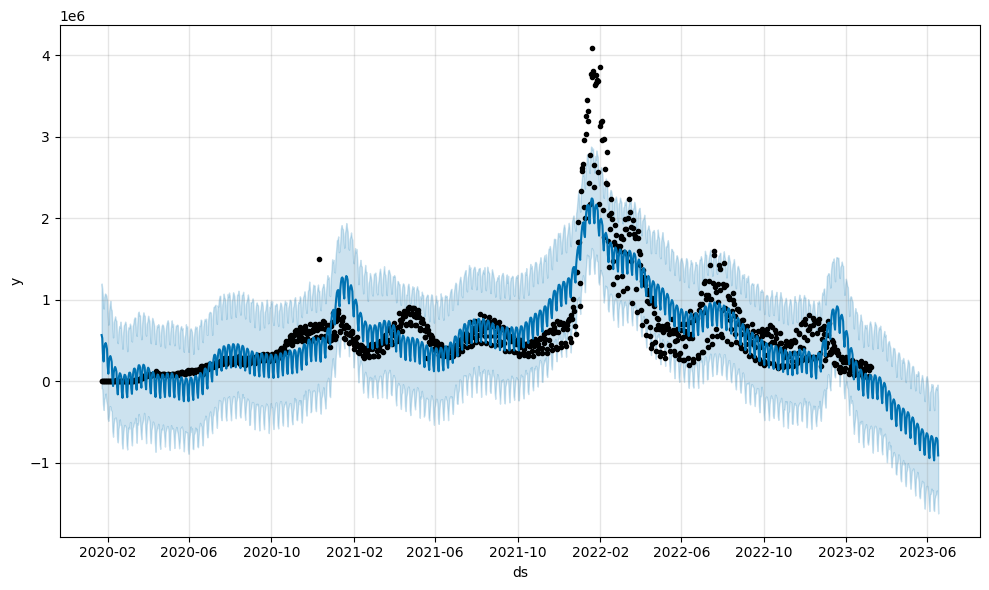

In [38]:
# Plot the forecast
fig = model.plot(forecast)
plt.show()


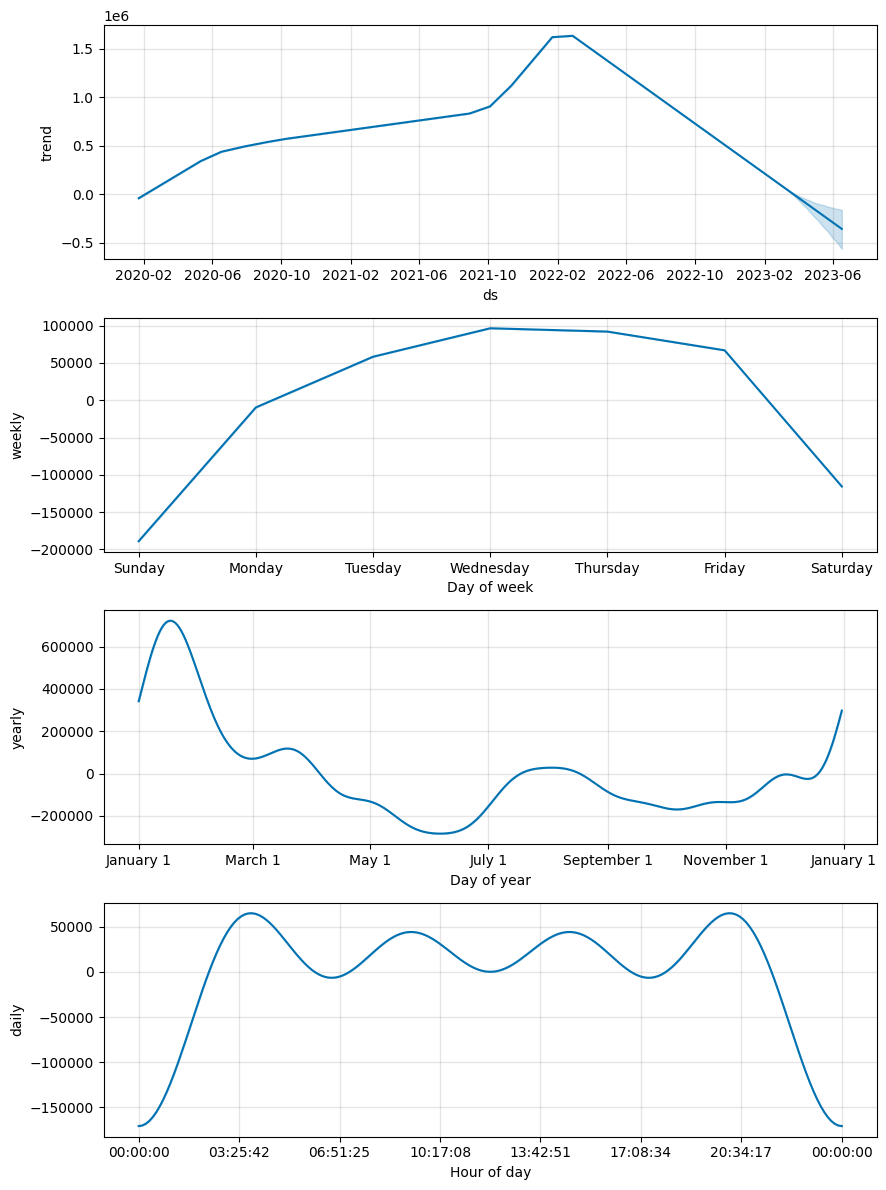

In [39]:
plt2 = m.plot_components(forecast)